In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import StandardScaler,minmax_scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score,GridSearchCV
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.Age.value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [6]:
len(train.loc[(train['Sex']=='female') & (train['Survived'] == 1)]) / len(train.loc[(train['Sex']=='female')])

0.7420382165605095

In [7]:
len(train.loc[(train['Sex']=='male') & (train['Survived'] == 1)]) / len(train.loc[(train['Sex']=='male')])

0.18890814558058924

In [8]:
#Based in sex more females survived


In [9]:
X = train.drop('Survived',axis=1)
y = train.Survived

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
X_train.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
columns = ['Pclass','Sex','Parch','SibSp']

In [13]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name,drop_first=True)
    df = pd.concat([df,dummies],axis=1)
    df = df.drop(column_name,axis=1)
    return df

In [14]:
X_train = create_dummies(X_train,'Sex')

In [15]:
X_train.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
445,446,1,"Dodge, Master. Washington",4.0,0,2,33638,81.8583,A34,S,1
650,651,3,"Mitkoff, Mr. Mito",NaN,0,0,349221,7.8958,NaN,S,1
172,173,3,"Johnson, Miss. Eleanor Ileen",1.0,1,1,347742,11.1333,NaN,S,0
450,451,2,"West, Mr. Edwy Arthur",36.0,1,2,C.A. 34651,27.7500,NaN,S,1
314,315,2,"Hart, Mr. Benjamin",43.0,1,1,F.C.C. 13529,26.2500,NaN,S,1


In [16]:
X_test = create_dummies(X_test,'Sex')

In [17]:
X_test.head()

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
709,710,3,"Moubarek, Master. Halim Gonios (""William George"")",NaN,1,1,2661,15.2458,NaN,C,1
439,440,2,"Kvillner, Mr. Johan Henrik Johannesson",31.0,0,0,C.A. 18723,10.5000,NaN,S,1
840,841,3,"Alhomaki, Mr. Ilmari Rudolf",20.0,0,0,SOTON/O2 3101287,7.9250,NaN,S,1
720,721,2,"Harper, Miss. Annie Jessie ""Nina""",6.0,0,1,248727,33.0000,NaN,S,0
39,40,3,"Nicola-Yarred, Miss. Jamila",14.0,1,0,2651,11.2417,NaN,C,0


In [18]:
train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Age           -0.077221
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
Name: Survived, dtype: float64

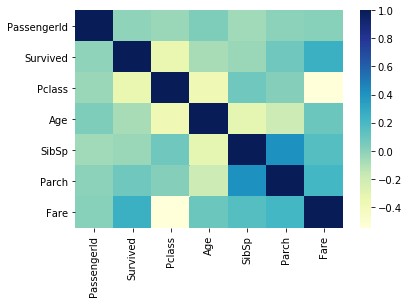

In [19]:
sns.heatmap(train.corr(),cmap="YlGnBu")

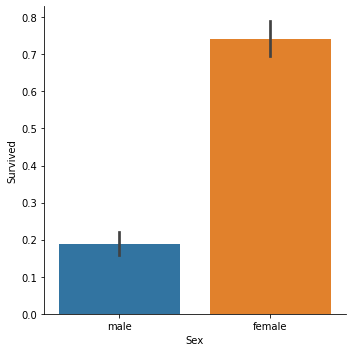

In [20]:
sns.catplot(x='Sex',y='Survived',data=train,kind='bar')

In [21]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=5)
classifier.fit(X_train[['Pclass','Sex_male','Parch','SibSp']],y_train)
y_pred = classifier.predict(X_test[['Pclass','Sex_male','Parch','SibSp']])

In [22]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       157
           1       0.80      0.67      0.73       111

    accuracy                           0.79       268
   macro avg       0.80      0.78      0.78       268
weighted avg       0.80      0.79      0.79       268



In [23]:
print(confusion_matrix(y_test,y_pred))

[[139  18]
 [ 37  74]]


In [24]:
sex_piviot = train.pivot_table(index='Sex',values='Survived')

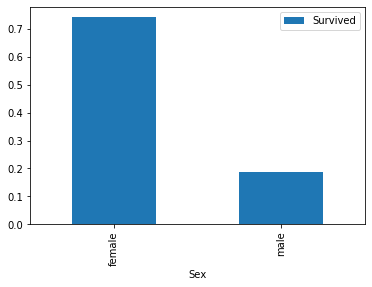

In [25]:
sex_piviot.plot.bar()

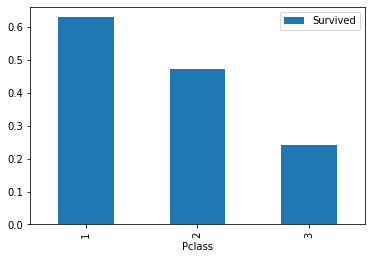

In [26]:
pclass_piviot = train.pivot_table(index='Pclass',values='Survived')
pclass_piviot.plot.bar()

From above more ppl who traveled in 1st class survived, and more females survived compared to males

In [27]:
def process_age(df,cut_points,label_names):
    df["Age"] = df["Age"].fillna(-0.5)
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

In [28]:
cut_points = [-1,0,5,12,18,35,60,100]
label_names = ['Missing','Infant','Child','Teenager','Young Adult',
               'Adult','Senior']

In [29]:
train = process_age(train,cut_points,label_names)
test = process_age(test,cut_points,label_names)

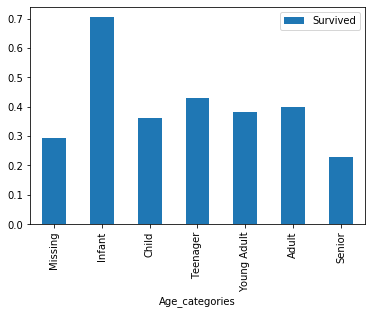

In [30]:
pivot = train.pivot_table(index='Age_categories',values='Survived')
pivot.plot.bar()
plt.show()

In [31]:
train = create_dummies(train,"Pclass")
test = create_dummies(test,"Pclass")
train = create_dummies(train,'Sex')
test = create_dummies(test,'Sex')
train = create_dummies(train,'Age_categories')
test = create_dummies(test,'Age_categories')

In [32]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,0,1,1,0,0,0,1,0,0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0,0,0,0,0,0,0,1,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0,0,0,0,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0,0,0,0,0,0,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,0,1,1,0,0,0,1,0,0


In [33]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior'],
      dtype='object')

In [34]:
cols = ['Pclass_2', 'Pclass_3', 'Sex_male','Age_categories_Infant', 'Age_categories_Child','Age_categories_Teenager', 'Age_categories_Young Adult','Age_categories_Adult', 'Age_categories_Senior']

In [35]:
X = train[cols]
y = train.Survived

In [36]:
X.head()

,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,0,1,1,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0
2,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,1,0,0
4,0,1,1,0,0,0,1,0,0


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [38]:
classifier = RandomForestClassifier(n_estimators=100,max_depth=5)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.96      0.85       157
           1       0.91      0.58      0.71       111

    accuracy                           0.80       268
   macro avg       0.84      0.77      0.78       268
weighted avg       0.83      0.80      0.79       268



In [40]:
print(confusion_matrix(y_test,y_pred))

[[151   6]
 [ 47  64]]


In [41]:
print(accuracy_score(y_test,y_pred))

0.8022388059701493


In [42]:
test_pred = classifier.predict(test[cols])

In [44]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [45]:
submission_df = {'PassengerId':test['PassengerId'],
                'Survived':test_pred}

In [46]:
submission = pd.DataFrame(submission_df)

In [48]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [49]:
test.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass_2,Pclass_3,Sex_male,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,Q,0,1,1,0,0,0,1,0,0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,S,0,1,0,0,0,0,0,1,0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,Q,1,0,1,0,0,0,0,0,1
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,S,0,1,1,0,0,0,1,0,0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,S,0,1,0,0,0,0,1,0,0


In [50]:
submission.to_csv('submission.csv',index=False)

In [51]:
test.Fare = test.Fare.fillna(train.Fare.mean())
train.Fare = train.Fare.fillna(train.Fare.mean())

In [52]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [53]:
len(train)

891

In [54]:
train.Embarked = train.Embarked.fillna('S')
test.Embarked = test.Embarked.fillna('S')

In [55]:
train = create_dummies(train,'Embarked')

In [62]:
cols = ['SibSp', 'Parch','Fare']
for col in cols:
    train[col + "_scaled"] = minmax_scale(train[col])
    test[col + "_scaled"] = minmax_scale(test[col])

In [63]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,...,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,0,1,0,0,0,1,0.125,0.0,0.014151
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,...,0,0,0,1,0,0,0,0.125,0.0,0.139136
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,0,1,0,0,0,1,0.000,0.0,0.015469
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,...,0,0,1,0,0,0,1,0.125,0.0,0.103644
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,0,1,0,0,0,1,0.000,0.0,0.015713


In [64]:
train.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Embarked_Q',
       'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled'],
      dtype='object')

In [70]:
columns = ['Age_categories_Infant', 'Age_categories_Child',
       'Age_categories_Teenager', 'Age_categories_Young Adult',
       'Age_categories_Adult', 'Age_categories_Senior', 'Embarked_Q',
       'Embarked_S', 'SibSp_scaled', 'Parch_scaled', 'Fare_scaled','Sex_male','Pclass_2', 'Pclass_3']

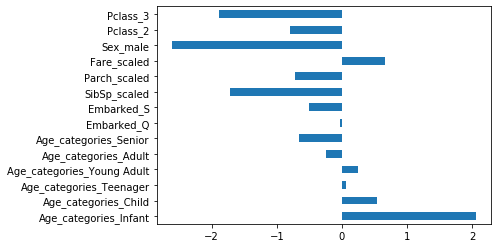

In [71]:
regressor = LogisticRegression()
regressor.fit(train[columns],train['Survived'])
coefficients = regressor.coef_
feature_importance = pd.Series(coefficients[0],index=train[columns].columns)
feature_importance.plot.barh()

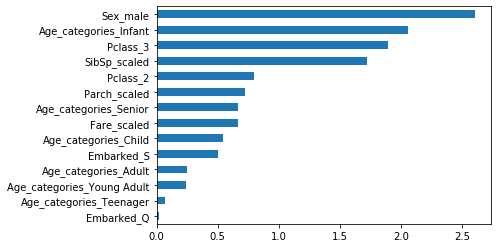

In [72]:
ordered_feature_importance = feature_importance.abs().sort_values()
ordered_feature_importance.plot.barh()
plt.show()

In [75]:
columns = ['Age_categories_Infant','Sex_male','Pclass_3','SibSp_scaled','Pclass_2','Parch_scaled','Age_categories_Senior','Fare_scaled']
lr = RandomForestClassifier(n_estimators=100,max_depth=5)
scores = cross_val_score(lr,train[columns],train['Survived'],cv=10)
accuracy = scores.mean()

In [76]:
accuracy

0.8238576779026217

In [77]:
allX = train[columns]
ally = train.Survived
classifier = RandomForestClassifier(n_estimators=100,max_depth=5)
classifier.fit(allX,ally)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [78]:
test_pred = classifier.predict(test[columns])

In [79]:
submission = pd.DataFrame({"PassengerId":test["PassengerId"],'Survived':test_pred})
submission.to_csv('submission_1.csv',index=False)

In [80]:
train.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,...,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior,Embarked_Q,Embarked_S,SibSp_scaled,Parch_scaled,Fare_scaled
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,...,0,0,1,0,0,0,1,0.125,0.0,0.014151
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,...,0,0,0,1,0,0,0,0.125,0.0,0.139136
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,...,0,0,1,0,0,0,1,0.000,0.0,0.015469
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,...,0,0,1,0,0,0,1,0.125,0.0,0.103644
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,...,0,0,1,0,0,0,1,0.000,0.0,0.015713


In [83]:
rf = RandomForestClassifier(random_state=1)
hyperparameters = {"criterion": ["entropy", "gini"],
                   "max_depth": [5, 10],
                   "max_features": ["log2", "sqrt"],
                   "min_samples_leaf": [1, 5],
                   "min_samples_split": [3, 5],
                   "n_estimators": [6, 9]
}
grid = GridSearchCV(rf,param_grid=hyperparameters,cv=10)
grid.fit(allX,ally)
best_params = grid.best_params_
best_score = grid.best_score_

In [84]:
best_params

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_leaf': 5,
 'min_samples_split': 3,
 'n_estimators': 9}

In [85]:
best_score

0.8305742821473159

In [86]:
best_rf = grid.best_estimator_

In [87]:
y_pred = best_rf.predict(test[columns])
submission = pd.DataFrame({"PassengerId":test["PassengerId"],'Survived':test_pred})
submission.to_csv('submission_2.csv',index=False)